In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Load data as panda dataframe and perform EDA like data analysis , data cleaning


In [5]:
ini_df = pd.read_csv('day.csv')
ini_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
ini_df.shape

(730, 16)

In [7]:
#check for null values

ini_df.isnull().sum()
# luckly there are no null values 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
ini_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
ini_df.season = ini_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [10]:
daydf = ini_df.copy()

In [11]:
daydf.head()
#Now date is renamed and and season is mapped 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Lets visualize data using some plots

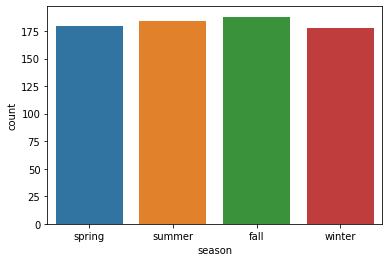

In [12]:
sns.countplot(x= daydf["season"])
plt.show()

#looks data is equally spread with same number of rows

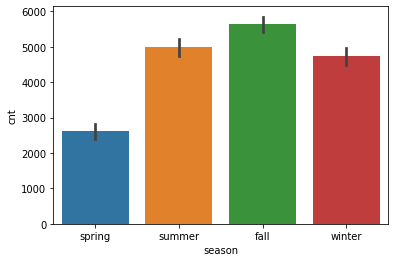

In [13]:
sns.barplot('season','cnt',data=daydf)
plt.show()

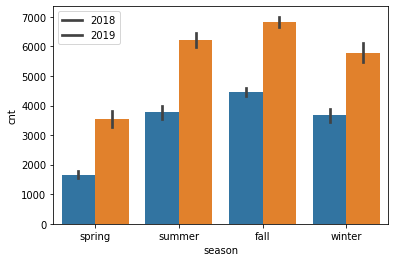

In [14]:
#Lets see by year
sns.barplot('season','cnt',data=daydf, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

There is an increase in fall and its consistent with both years

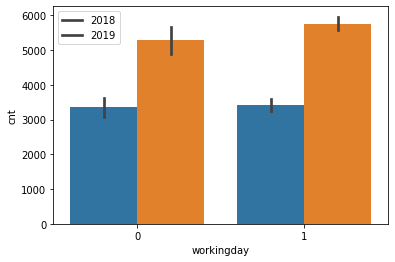

In [15]:
sns.barplot('workingday','cnt',data=daydf, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

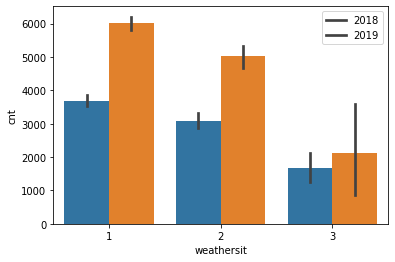

In [16]:
sns.barplot('weathersit','cnt',data=daydf, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

In [17]:
#map weather 
daydf.weathersit = daydf.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

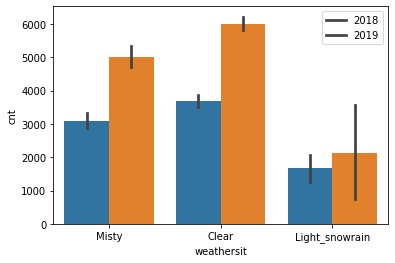

In [18]:
sns.barplot('weathersit','cnt',data=daydf, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()
# Its more during clear mist and drops dueing snowrain

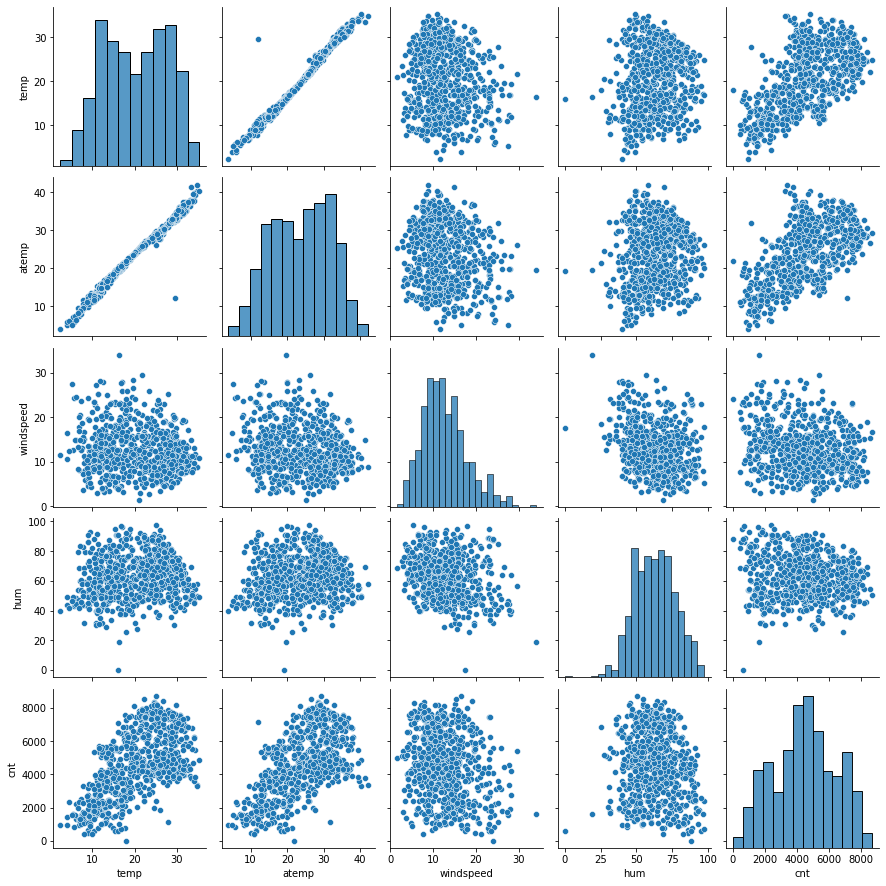

In [19]:
numericColumns = ['temp','atemp','windspeed','hum','cnt']
sns.pairplot(data=daydf,vars=numericColumns)
plt.show()

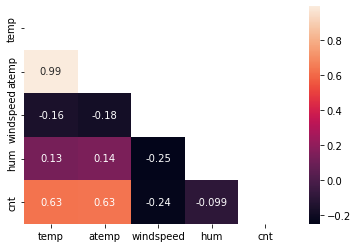

In [20]:
#Correlation Matrix

tri = np.triu(daydf[numericColumns].corr())
sns.heatmap(daydf[numericColumns].corr(), annot = True,mask=tri)
plt.show()

In [21]:
daydf = daydf.drop(columns=['atemp'])

temp and atemp are highly correlated

# Linear Regression

In [22]:
daydf = pd.get_dummies(data=daydf,columns=["season","mnth","weekday","weathersit"],drop_first=True)
        

In [23]:
daydf.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_snowrain,weathersit_Misty
0,1,01-01-2018,0,0,0,14.110847,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,1,0,1
1,2,02-01-2018,0,0,0,14.902598,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,0,1
2,3,03-01-2018,0,0,1,8.050924,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,59.0435,10.739832,108,1454,...,0,0,0,1,0,0,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,43.6957,12.522300,82,1518,...,0,0,0,0,1,0,0,0,0,0


In [24]:
daydf.drop(['dteday'],axis=1,inplace=True)
#Lets get train and test data set 
y=daydf.pop('cnt')


X=daydf

#70/30 ratin for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [26]:
scaler = MinMaxScaler()
# Let us scale continuous variables
numericColumns = ['temp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[numericColumns] = scaler.fit_transform(X_train[numericColumns])

In [27]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [38]:
#using automated approach
rfdf = RFE(linreg,n_features_to_select=14)
rfdf.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=14)

In [39]:
list(zip(X_train.columns,rfdf.support_,rfdf.ranking_))

[('instant', False, 18),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 8),
 ('windspeed', False, 2),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_spring', False, 11),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_2', False, 3),
 ('mnth_3', True, 1),
 ('mnth_4', False, 5),
 ('mnth_5', True, 1),
 ('mnth_6', False, 16),
 ('mnth_7', False, 14),
 ('mnth_8', True, 1),
 ('mnth_9', False, 15),
 ('mnth_10', True, 1),
 ('mnth_11', False, 17),
 ('mnth_12', True, 1),
 ('weekday_1', False, 4),
 ('weekday_2', True, 1),
 ('weekday_3', False, 7),
 ('weekday_4', False, 9),
 ('weekday_5', False, 10),
 ('weekday_6', False, 13),
 ('weathersit_Light_snowrain', False, 12),
 ('weathersit_Misty', True, 1)]

### Building Linear Regression Model

In [40]:
refColumns = X_train.columns[rfdf.support_]
X_train_rfdf = X_train[refColumns]

In [41]:


X_train_lm_1 = sm.add_constant(X_train_rfdf)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.683e+31
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:15:36   Log-Likelihood:                 12982.
No. Observations:                 511   AIC:                        -2.593e+04
Df Residuals:                     496   BIC:                        -2.587e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.592e-12   3.88e-13  

Now check VIF to see which one to drop

In [42]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_rfdf.values, i) for i in range(X_train_rfdf.shape[1])]
vif['variable'] = X_train_rfdf.columns

In [43]:
vif

,VIF,variable
0,4.877907,yr
1,1.075902,holiday
2,9.090223,workingday
3,16.178645,temp
4,9.145775,casual
5,34.630229,registered
6,2.810490,season_winter
7,1.196605,mnth_3
8,1.255284,mnth_5
9,1.376172,mnth_8


In [ ]:
# Let drop registered as it got high VIF

In [46]:
col = refColumns.drop(['registered'])
X_train_rfdf = X_train[col]
X_train_sm = sm.add_constant(X_train_rfdf)
linreg = sm.OLS(y_train, X_train_sm)
linreg_model = linreg.fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     283.4
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          3.89e-220
Time:                        23:20:07   Log-Likelihood:                -4052.4
No. Observations:                 511   AIC:                             8133.
Df Residuals:                     497   BIC:                             8192.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -269.9008    115.772     -2.331      0.020    -497.364     -42.438
yr                1521.0854     65.118     23.359      0.000    1393.145    1649.026
holiday            165.5772    201.439      0.822      0.411    -230.199     561.353
workingday        1667.5465     94.475     17.651      0.000    1481.927    1853.166
temp              2146.4831    206.398     10.400      0.000    1740.964    2552.002
casual               1.8631      0.079     23.505      0.000       1.707       2.019
season_winter      964.7799     95.633     10.088      0.000     776.885    1152.675
mnth_3            -147.4276    109.007     -1.352      0.177    -361.598      66.743
mnth_5             195.5492    116.238      1.682      0.093     -32.830     423.928
mnth_8             120.8205    115.079      1.050      0.294    -105.281     346.922
mnth_10           -421.4147    135.646     -3.107      0.002    -687.926    -154.904
mnth_12            113.8790    124.732      0.913      0.362    -131.188     358.946
weekday_2           72.6671     92.637      0.784      0.433    -109.341     254.675
weathersit_Misty  -281.1261     65.068     -4.320      0.000    -408.969    -153.283
==============================================================================
Omnibus:                      145.074   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.650
Skew:                          -1.179   Prob(JB):                    1.93e-147
Kurtosis:                       8.116   Cond. No.                     8.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_rfdf.values, i) for i in range(X_train_rfdf.shape[1])]
vif['variable'] = X_train_rfdf.columns
vif

,VIF,variable
0,2.350446,yr
1,1.075705,holiday
2,5.426544,workingday
3,13.344865,temp
4,7.462298,casual
5,2.358292,season_winter
6,1.186735,mnth_3
7,1.247858,mnth_5
8,1.371110,mnth_8
9,1.736976,mnth_10


In [ ]:
#Drop Casual

In [50]:
col = refColumns.drop(['casual','registered'])
X_train_rfdf = X_train[col]
X_train_sm = sm.add_constant(X_train_rfdf)
linreg = sm.OLS(y_train, X_train_sm)
linreg_model = linreg.fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     123.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          6.51e-141
Time:                        23:21:47   Log-Likelihood:                -4243.4
No. Observations:                 511   AIC:                             8513.
Df Residuals:                     498   BIC:                             8568.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              424.4804    162.500      2.612      0.009     105.211     743.750
yr                2066.9211     88.315     23.404      0.000    1893.405    2240.437
holiday           -638.7067    288.173     -2.216      0.027   -1204.892     -72.521
workingday         153.0917    100.302      1.526      0.128     -43.976     350.159
temp              5240.4070    230.781     22.707      0.000    4786.982    5693.832
season_winter     1044.0977    138.742      7.525      0.000     771.506    1316.689
mnth_3             112.3411    157.427      0.714      0.476    -196.961     421.643
mnth_5             533.8995    167.441      3.189      0.002     204.921     862.878
mnth_8              58.4845    167.013      0.350      0.726    -269.652     386.621
mnth_10           -183.1370    196.364     -0.933      0.351    -568.941     202.667
mnth_12           -143.2383    180.373     -0.794      0.428    -497.623     211.147
weekday_2          -42.2263    134.291     -0.314      0.753    -306.073     221.621
weathersit_Misty  -510.8449     93.386     -5.470      0.000    -694.325    -327.365
==============================================================================
Omnibus:                      105.563   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              346.722
Skew:                          -0.941   Prob(JB):                     5.13e-76
Kurtosis:                       6.570   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_rfdf.values, i) for i in range(X_train_rfdf.shape[1])]
vif['variable'] = X_train_rfdf.columns
vif

,VIF,variable
0,1.986191,yr
1,1.060422,holiday
2,3.095485,workingday
3,4.046398,temp
4,2.334118,season_winter
5,1.147698,mnth_3
6,1.229026,mnth_5
7,1.366439,mnth_8
8,1.729139,mnth_10
9,1.358358,mnth_12


In [ ]:
#Now all are below .05

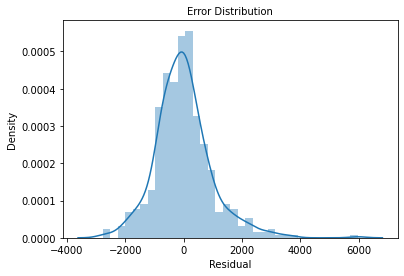

In [54]:
y_train_pred = linreg_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual', fontdict={'fontsize': 10})
plt.title('Error Distribution', fontdict={'fontsize': 10})
plt.show()

Distribution is normal

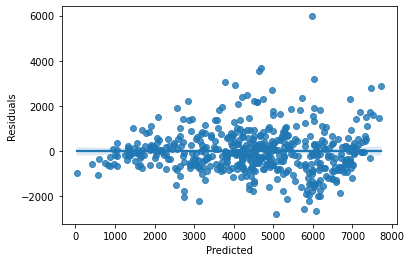

In [58]:
sns.regplot(x=y_train_pred, y=residual)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

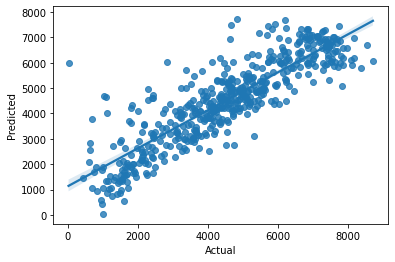

In [59]:
sns.regplot(x=y_train, y=y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Test Data prediction

In [83]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
#Scale variables in X_test


X_test[num_vars] = scaler.transform(X_test[numericColumns])


In [92]:
X_train_rfdf.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'season_winter', 'mnth_3',
       'mnth_5', 'mnth_8', 'mnth_10', 'mnth_12', 'weekday_2',
       'weathersit_Misty'],
      dtype='object')

In [99]:
X_test_pred= X_test[X_train_rfdf.columns]
X_test_pred = sm.add_constant(X_test_pred)


In [100]:
y_test_pred = linreg_model.predict(X_test_pred)

In [98]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64